In [1]:
!pip install mlxtend
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel("sikayetler.xlsx")
df.head()

,Year,Complaint No.,Notification Date,Customer,Customer Location,Part Number,Initial Qty Notified,Failure Mode
0,2021,2021-01,2021-01-05,ZF,Charleston,9122180105,1,Casting
1,2021,2021-02,2021-01-06,Bosch Rexroth,Turkey,R917004218,16,Casting
2,2021,2021-03,2021-01-19,ZF,Hannover,6401756514,1,Burr
3,2021,2021-04,2021-02-01,Bosch Rexroth,Turkey,R908101799,1,Missing Operation
4,2021,2021-06,2021-02-01,Bosch Rexroth,China,R909921040,1,Labeling


In [2]:
null_counts = df.isnull().sum()
print(null_counts)
# Silmek istediğiniz kolonları belirleyin
columns_to_drop = ['Complaint No.', 'Notification Date', 'Part Number']

# Belirlediğiniz kolonları veri setinizden çıkarın
df = df.drop(columns=columns_to_drop)

# "1\n2" değerini içeren satırın indeksini bulma
index_to_remove = df[df['Initial Qty Notified'] == '1\n2'].index
# İlgili satırı veri setinden çıkarma
df = df.drop(index_to_remove)
# for value in df['Initial Qty Notified']:
#     print(repr(value))
print(df.dtypes)

Year                    0
Complaint No.           0
Notification Date       0
Customer                0
Customer Location       0
Part Number             0
Initial Qty Notified    2
Failure Mode            1
dtype: int64
Year                     int64
Customer                object
Customer Location       object
Initial Qty Notified    object
Failure Mode            object
dtype: object


In [3]:
null_counts = df.isnull().sum()
print(null_counts)
# null_count_initial_qty = df['Initial Qty Notified'].isnull().sum()
# print("Initial Qty Notified Sütunundaki Null Değer Sayısı:", null_count_initial_qty)

Year                    0
Customer                0
Customer Location       0
Initial Qty Notified    2
Failure Mode            1
dtype: int64


In [4]:
mode_values = df.mode().iloc[0]
print(mode_values)
df = df.fillna(mode_values)
# Doldurulmuş veriyi görüntüleyin
# print(df)
print(df.dtypes)

Year                             2022
Customer                Bosch Rexroth
Customer Location             Germany
Initial Qty Notified                1
Failure Mode                 Diameter
Name: 0, dtype: object
Year                     int64
Customer                object
Customer Location       object
Initial Qty Notified     int64
Failure Mode            object
dtype: object


In [5]:
null_counts = df.isnull().sum()
print(null_counts)

Year                    0
Customer                0
Customer Location       0
Initial Qty Notified    0
Failure Mode            0
dtype: int64


In [6]:
# df['Initial Qty Notified'] = df['Initial Qty Notified'].astype(int)
# "object" veri türüne sahip sütun adlarını belirleyin
object_columns = ['Customer', 'Customer Location','Failure Mode']

# Belirlediğiniz sütunlardaki veriyi "kategorik" veri türüne dönüştürün
df[object_columns] = df[object_columns].astype('category')

# Veriyi görüntüleyin
print(df.dtypes)

Year                       int64
Customer                category
Customer Location       category
Initial Qty Notified       int64
Failure Mode            category
dtype: object


In [7]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


df['Year'] = df['Year'].astype('category')

data_encoded = pd.get_dummies(df, columns=['Customer', 'Customer Location', 'Failure Mode','Year','Initial Qty Notified'])


# columns_to_drop = ['Initial Qty Notified']

# # Belirlediğiniz kolonları veri setinizden çıkarın
# data_encoded = data_encoded.drop(columns=columns_to_drop)

# Frequent itemsets bulma
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)

# Kuralları çıkarma
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Kuralları önem sırasına göre sıralayın
rules = rules.sort_values(by='lift', ascending=False)

# İstediğiniz şekilde kural sonuçlarını görüntüleyebilirsiniz
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Customer_Bobcat),(Customer Location_Czech),0.074675,0.097403,0.074675,1.000000,10.266667,0.067402,inf,0.975439
1,(Customer Location_Czech),(Customer_Bobcat),0.097403,0.074675,0.074675,0.766667,10.266667,0.067402,3.965677,1.000000
107,"(Customer_Bosch Rexroth, Failure Mode_Casting)",(Customer Location_Turkey),0.097403,0.181818,0.058442,0.600000,3.300000,0.040732,2.045455,0.772182
110,(Customer Location_Turkey),"(Customer_Bosch Rexroth, Failure Mode_Casting)",0.181818,0.097403,0.058442,0.321429,3.300000,0.040732,1.330144,0.851852
40,(Customer Location_Turkey),(Failure Mode_Casting),0.181818,0.129870,0.058442,0.321429,2.475000,0.034829,1.282297,0.728395


In [8]:
sorted_rules_by_support = rules.sort_values(by='support', ascending=False)
# Destek değeri en yüksek 10 kuralı göster
top_10_support = sorted_rules_by_support.head(10)
print("En Yüksek 10 Support Değerine Sahip Kural:")
# print(top_10_support[['antecedents', 'consequents', 'support']])
top_10_support

En Yüksek 10 Support Değerine Sahip Kural:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Year_2022),(Customer_Bosch Rexroth),0.493506,0.639610,0.383117,0.776316,1.213732,0.067465,1.611154,0.347675
18,(Customer_Bosch Rexroth),(Year_2022),0.639610,0.493506,0.383117,0.598985,1.213732,0.067465,1.263028,0.488624
21,(Initial Qty Notified_1),(Customer_Bosch Rexroth),0.490260,0.639610,0.376623,0.768212,1.201062,0.063048,1.554824,0.328410
20,(Customer_Bosch Rexroth),(Initial Qty Notified_1),0.639610,0.490260,0.376623,0.588832,1.201062,0.063048,1.239739,0.464508
5,(Customer Location_Germany),(Customer_Bosch Rexroth),0.360390,0.639610,0.318182,0.882883,1.380345,0.087673,3.077173,0.430799
4,(Customer_Bosch Rexroth),(Customer Location_Germany),0.639610,0.360390,0.318182,0.497462,1.380345,0.087673,1.272760,0.764571
36,(Customer Location_Germany),(Year_2022),0.360390,0.493506,0.240260,0.666667,1.350877,0.062405,1.519481,0.406091
37,(Year_2022),(Customer Location_Germany),0.493506,0.360390,0.240260,0.486842,1.350877,0.062405,1.246420,0.512821
38,(Customer Location_Germany),(Initial Qty Notified_1),0.360390,0.490260,0.237013,0.657658,1.341447,0.060328,1.488978,0.397956
39,(Initial Qty Notified_1),(Customer Location_Germany),0.490260,0.360390,0.237013,0.483444,1.341447,0.060328,1.238220,0.499346


In [9]:
# rules DataFrame'ini güven değerine göre sırala
sorted_rules_by_confidence = rules.sort_values(by='confidence', ascending=False)

# Güven değeri en yüksek 10 kuralı göster
top_10_confidence = sorted_rules_by_confidence.head(10)
print("\nEn Yüksek 10 Confidence Değerine Sahip Kural:")
# print(top_10_confidence[['antecedents', 'consequents', 'confidence']])
top_10_confidence


En Yüksek 10 Confidence Değerine Sahip Kural:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Customer_Bobcat),(Customer Location_Czech),0.074675,0.097403,0.074675,1.000000,10.266667,0.067402,inf,0.975439
7,(Customer Location_Turkey),(Customer_Bosch Rexroth),0.181818,0.639610,0.181818,1.000000,1.563452,0.065525,inf,0.440476
108,"(Customer Location_Turkey, Failure Mode_Casting)",(Customer_Bosch Rexroth),0.058442,0.639610,0.058442,1.000000,1.563452,0.021062,inf,0.382759
120,"(Customer Location_Turkey, Year_2022)",(Customer_Bosch Rexroth),0.103896,0.639610,0.103896,1.000000,1.563452,0.037443,inf,0.402174
85,"(Failure Mode_Thread, Customer Location_Germany)",(Customer_Bosch Rexroth),0.051948,0.639610,0.051948,1.000000,1.563452,0.018722,inf,0.380137
125,"(Customer Location_Turkey, Initial Qty Notifie...",(Customer_Bosch Rexroth),0.074675,0.639610,0.074675,1.000000,1.563452,0.026912,inf,0.389474
209,"(Failure Mode_Diameter, Customer Location_Germ...",(Customer_Bosch Rexroth),0.064935,0.639610,0.064935,1.000000,1.563452,0.023402,inf,0.385417
113,"(Year_2021, Customer Location_Turkey)",(Customer_Bosch Rexroth),0.061688,0.639610,0.061688,1.000000,1.563452,0.022232,inf,0.384083
250,"(Year_2022, Customer Location_Germany, Initial...",(Customer_Bosch Rexroth),0.162338,0.639610,0.159091,0.980000,1.532183,0.055258,18.019481,0.414650
96,"(Customer Location_Germany, Year_2022)",(Customer_Bosch Rexroth),0.240260,0.639610,0.230519,0.959459,1.500069,0.076847,8.889610,0.438787


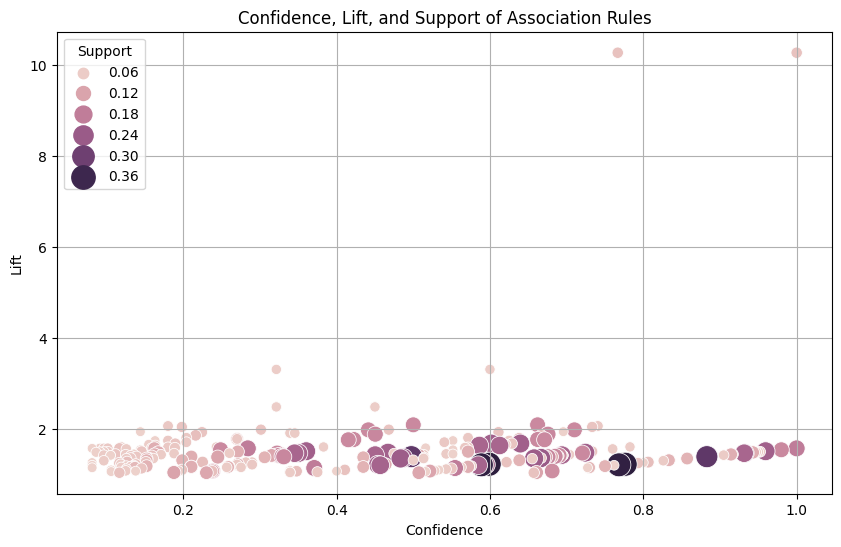

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x="confidence", y="lift", hue="support", size="support", sizes=(50, 300))
plt.title("Confidence, Lift, and Support of Association Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.legend(title="Support")
plt.grid(True)
plt.show()

In [11]:
# Confidence eşiği
min_confidence = 0.6
min_support = 0.1
min_lift=1
# Confidence filtresi uygulama
# high_confidence_rules = rules[(rules['confidence'] >= min_confidence) & (rules['confidence'] < 1)]
filtered_rules = rules[(rules['confidence'] >= min_confidence) & (rules['confidence'] < 1)  & (rules['support'] >= min_support)]

# high_confidence_rules = rules[rules['support'] >= min_support]
# high_confidence_rules = rules[rules['lift'] >= min_lift]

# Filtrelenen sonuçları görüntüleme
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
254,"(Year_2022, Initial Qty Notified_1)","(Customer_Bosch Rexroth, Customer Location_Ger...",0.240260,0.318182,0.159091,0.662162,2.081081,0.082645,2.018182,0.683761
249,"(Year_2022, Customer_Bosch Rexroth, Initial Qt...",(Customer Location_Germany),0.224026,0.360390,0.159091,0.710145,1.970492,0.078354,2.206656,0.634702
197,"(Year_2022, Initial Qty Notified_1)",(Customer Location_Germany),0.240260,0.360390,0.162338,0.675676,1.874848,0.075751,1.972132,0.614188
257,"(Customer Location_Germany, Year_2022)","(Customer_Bosch Rexroth, Initial Qty Notified_1)",0.240260,0.376623,0.159091,0.662162,1.758155,0.068603,1.845195,0.567591
253,"(Customer Location_Germany, Initial Qty Notifi...","(Customer_Bosch Rexroth, Year_2022)",0.237013,0.383117,0.159091,0.671233,1.752032,0.068287,1.876353,0.562571
98,(Customer Location_Germany),"(Customer_Bosch Rexroth, Year_2022)",0.360390,0.383117,0.230519,0.639640,1.669568,0.092448,1.711851,0.627011
95,"(Customer_Bosch Rexroth, Year_2022)",(Customer Location_Germany),0.383117,0.360390,0.230519,0.601695,1.669568,0.092448,1.605830,0.650111
104,(Customer Location_Germany),"(Customer_Bosch Rexroth, Initial Qty Notified_1)",0.360390,0.376623,0.220779,0.612613,1.626592,0.085048,1.609182,0.602269
250,"(Year_2022, Customer Location_Germany, Initial...",(Customer_Bosch Rexroth),0.162338,0.639610,0.159091,0.980000,1.532183,0.055258,18.019481,0.414650
96,"(Customer Location_Germany, Year_2022)",(Customer_Bosch Rexroth),0.240260,0.639610,0.230519,0.959459,1.500069,0.076847,8.889610,0.438787


In [12]:
df.dtypes

Year                    category
Customer                category
Customer Location       category
Initial Qty Notified       int64
Failure Mode            category
dtype: object

In [13]:
df = pd.get_dummies(df, columns=['Customer', 'Customer Location', 'Failure Mode','Year'])

In [14]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Bağımsız değişkenler ve hedef değişkeni ayırma
# X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
# y = df["Initial Qty Notified"]

# # Veriyi eğitim ve test verisi olarak bölmek
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # KNN modelini eğitme
# model = KNeighborsClassifier(n_neighbors=5)  # Örnek olarak 5 komşu kullanıldı
# model.fit(X_train, y_train)

# # Modeli değerlendirme
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Bağımsız değişkenler ve hedef değişkeni ayırma
X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
y = df["Initial Qty Notified"]

# Veriyi eğitim ve test verisi olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5967741935483871
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.95      0.75        37
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.50      0.25      0.33         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1

    accuracy                           0.60        62
   macro avg       0.11      0.11      0.10        62
weighted avg       0.43      0.60      0.49        62



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Bağımsız değişkenler ve hedef değişkeni ayırma
X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
y = df["Initial Qty Notified"]

# Veriyi eğitim ve test verisi olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.45161290322580644
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.70      0.66        37
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.67      0.50      0.57         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         334       0.00    

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Bağımsız değişkenler ve hedef değişkeni ayırma
X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
y = df["Initial Qty Notified"]

# Veriyi eğitim ve test verisi olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modelini eğitme
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.43548387096774194
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.68      0.68        37
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         121       0.00    

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Bağımsız değişkenler ve hedef değişkeni ayırma
X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
y = df["Initial Qty Notified"]

# Veriyi eğitim ve test verisi olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modelini eğitme
model = SVC(kernel='linear')  # Lineer kernel kullanıldı, kernel tipini ve diğer parametreleri veri setinize göre ayarlayabilirsiniz
model.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5806451612903226
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.92      0.77        37
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.50      0.25      0.33         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         334       0.00      0.00      0.00         0
         418       0.00      0.00      0.00         0
        2398       0.00      0.00      0.00         0

    accuracy               

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Bağımsız değişkenler ve hedef değişkeni ayırma
X = df.drop("Initial Qty Notified", axis=1)  # Hedef sütunu veri setinize göre belirleyin
y = df["Initial Qty Notified"]

# Veriyi eğitim ve test verisi olarak bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini eğitme
model = DecisionTreeClassifier(random_state=42)  # Rastgelelik kontrolü için random_state kullanıldı
model.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.45161290322580644
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.70      0.66        37
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.67      0.50      0.57         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
          88       0.00    

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 